# Convolutional Neural Network

### Importing the libraries

In [36]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [37]:
tf.__version__

'2.10.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [38]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [39]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [40]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [41]:
#cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.Conv2D(32 , 3, 3 , activation='relu', input_shape=[64, 64, 3]))

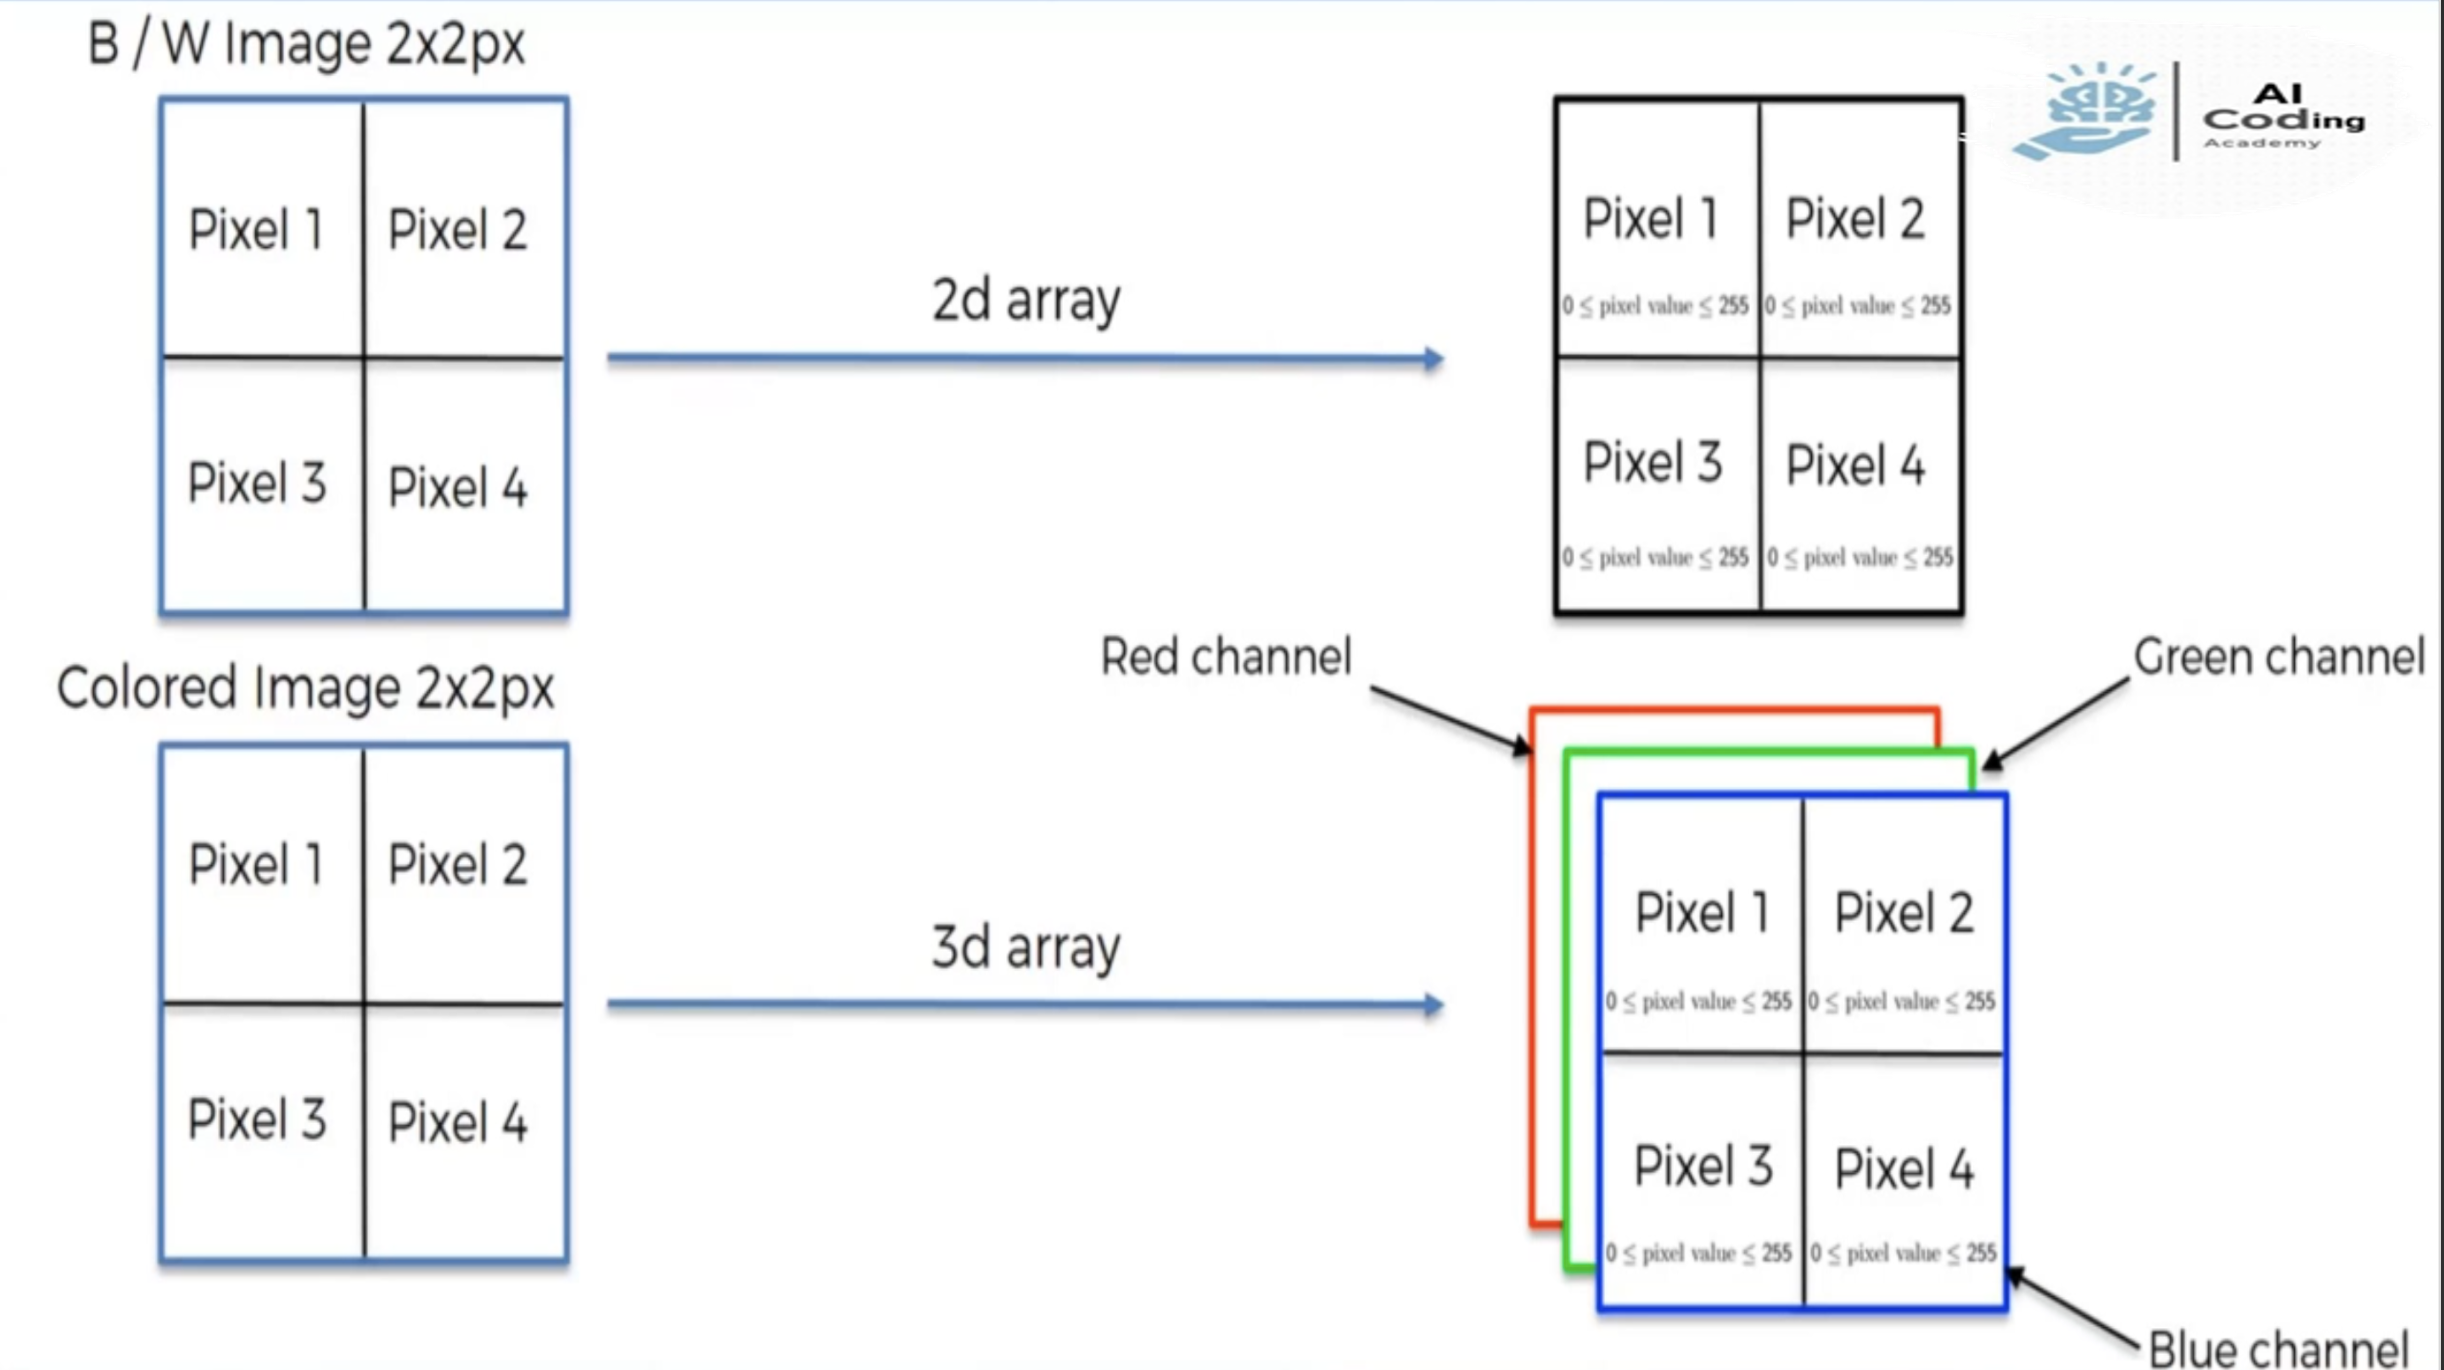

### Step 2 - Pooling

In [42]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# 2 to x 
#2 to y 


### Adding a second convolutional layer

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#cnn.add(tf.keras.layers.Conv2D(32 , 3, 3 , activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


### Step 3 - Flattening

In [44]:
cnn.add(tf.keras.layers.Flatten())

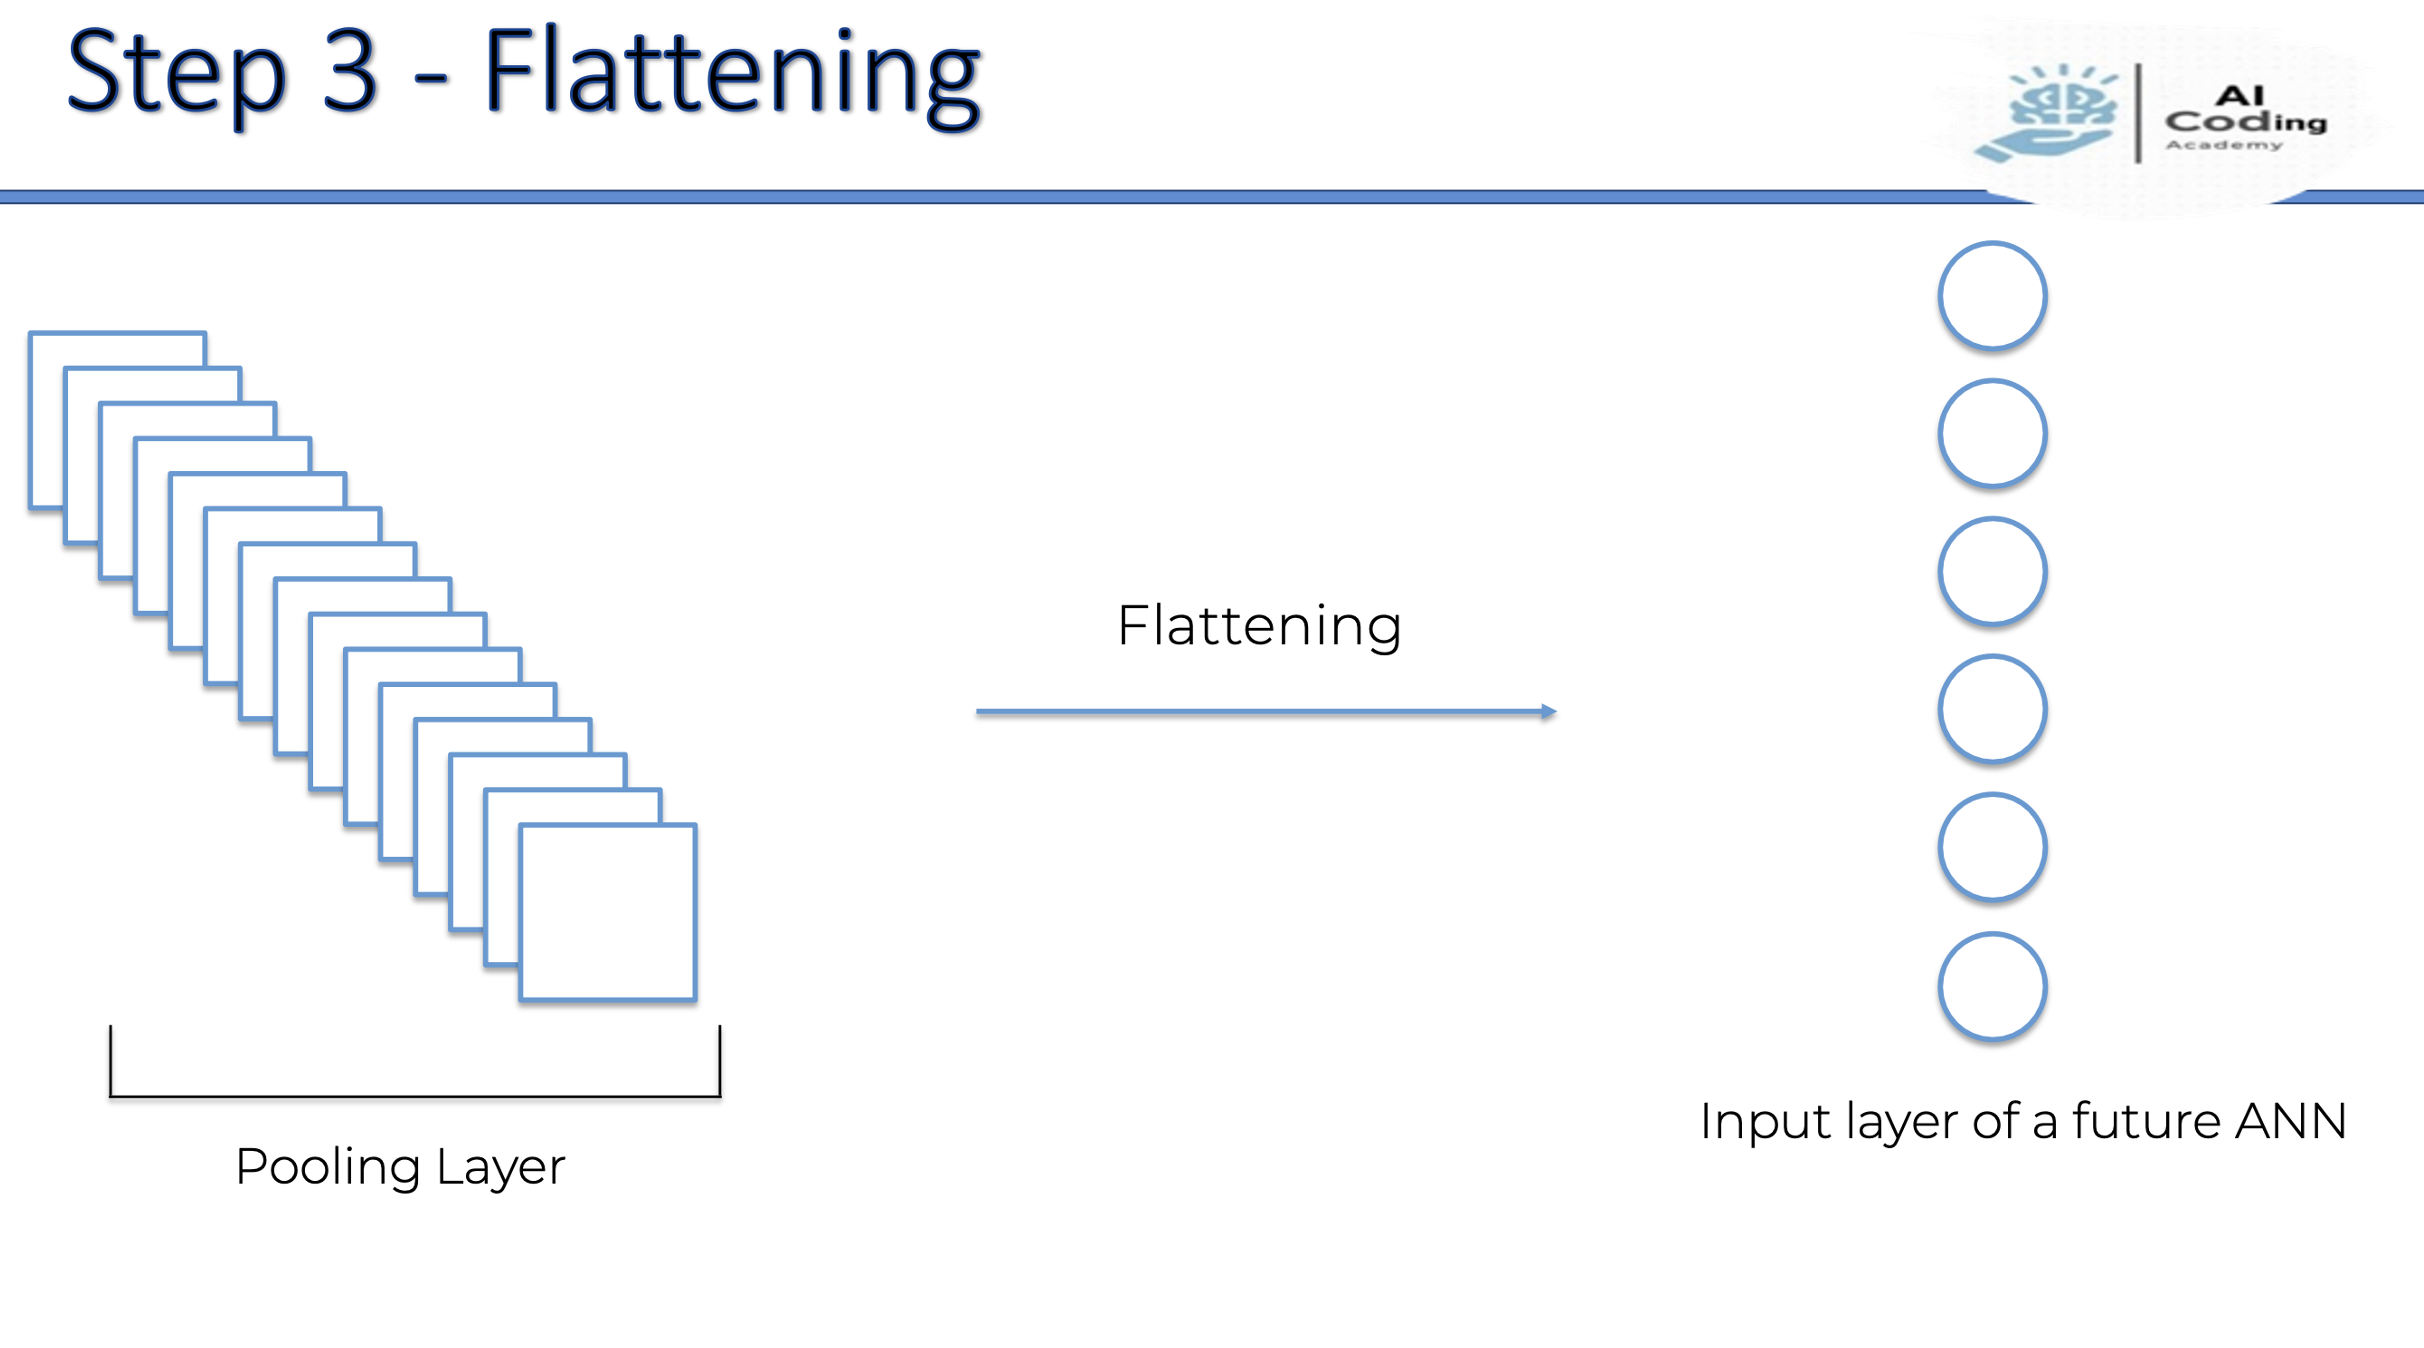

### Step 4 - Full Connection

In [45]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))


### Step 5 - Output Layer

In [46]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [47]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [48]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 24s 94ms/step - loss: 0.6689 - accuracy: 0.5771 - val_loss: 0.6216 - val_accuracy: 0.6665
Epoch 2/25
250/250 [==============================] - 23s 93ms/step - loss: 0.6106 - accuracy: 0.6679 - val_loss: 0.5950 - val_accuracy: 0.6840
Epoch 3/25
250/250 [==============================] - 22s 86ms/step - loss: 0.5771 - accuracy: 0.6975 - val_loss: 0.5748 - val_accuracy: 0.7130
Epoch 4/25
250/250 [==============================] - 21s 84ms/step - loss: 0.5600 - accuracy: 0.7114 - val_loss: 0.5584 - val_accuracy: 0.7225
Epoch 5/25
250/250 [==============================] - 22s 87ms/step - loss: 0.5324 - accuracy: 0.7303 - val_loss: 0.5403 - val_accuracy: 0.7360
Epoch 6/25
250/250 [==============================] - 23s 90ms/step - loss: 0.5150 - accuracy: 0.7475 - val_loss: 0.5334 - val_accuracy: 0.7490
Epoch 7/25
250/250 [==============================] - 23s 92ms/step - loss: 0.5105 - accuracy: 0.7445 - val_loss: 0.4969 - val_accuracy:

## Part 4 - Making a single prediction

In [15]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image

test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 122ms/step


In [16]:
print(prediction)

dog
